In [1]:
%pylab inline
%run helper_functions.py
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
sns.set_style("whitegrid")


Populating the interactive namespace from numpy and matplotlib


# LOAD IRIS DATASET

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
feature_names = iris.feature_names
y = iris.target
class_labels = iris.target_names

Accuracy Training         : 1.0
Accuracy Cross Validation : 0.97 (+/- 0.09)


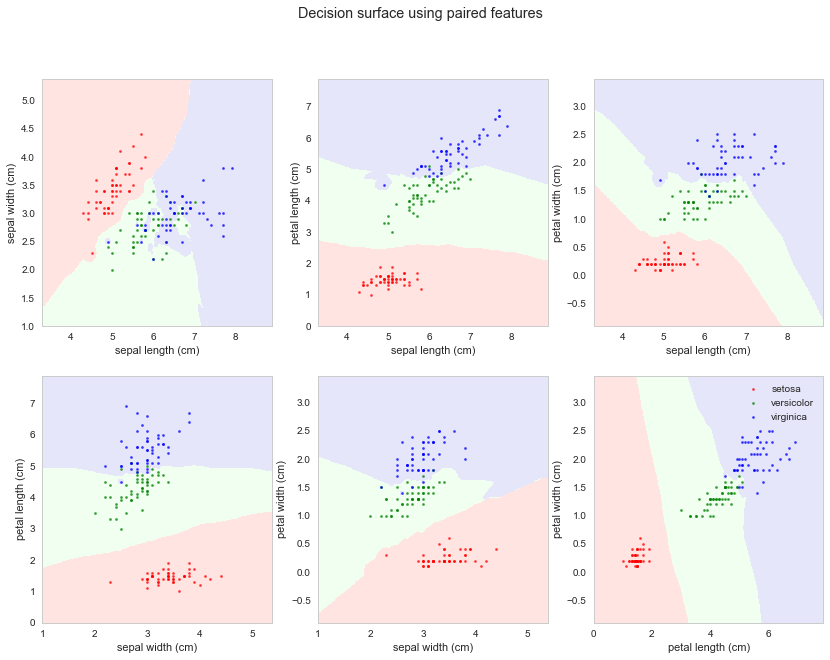

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance')


# score at training
score_test = knn.fit(X,y).score(X, y)
print("Accuracy Training         :", score_test)


scores = cross_val_score(knn, X, y, cv=10)
print("Accuracy Cross Validation : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

plot_boundaries_iris_dataset(knn, iris)

Best parameters:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')
Best score:  0.98


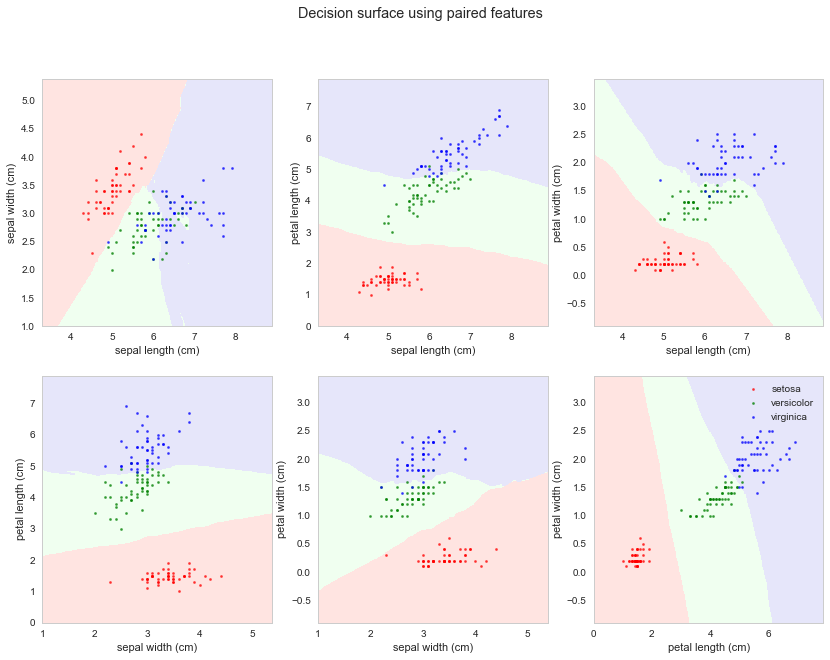

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

params = { 
           'n_neighbors':   range(1,55),
           'weights':   ['uniform', 'distance']
         }

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, cv = 10, param_grid=params )
grid.fit(X, y)

# summarize the results of the grid search
print("Best parameters: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

plot_boundaries_iris_dataset(grid.best_estimator_, iris)

# Regression

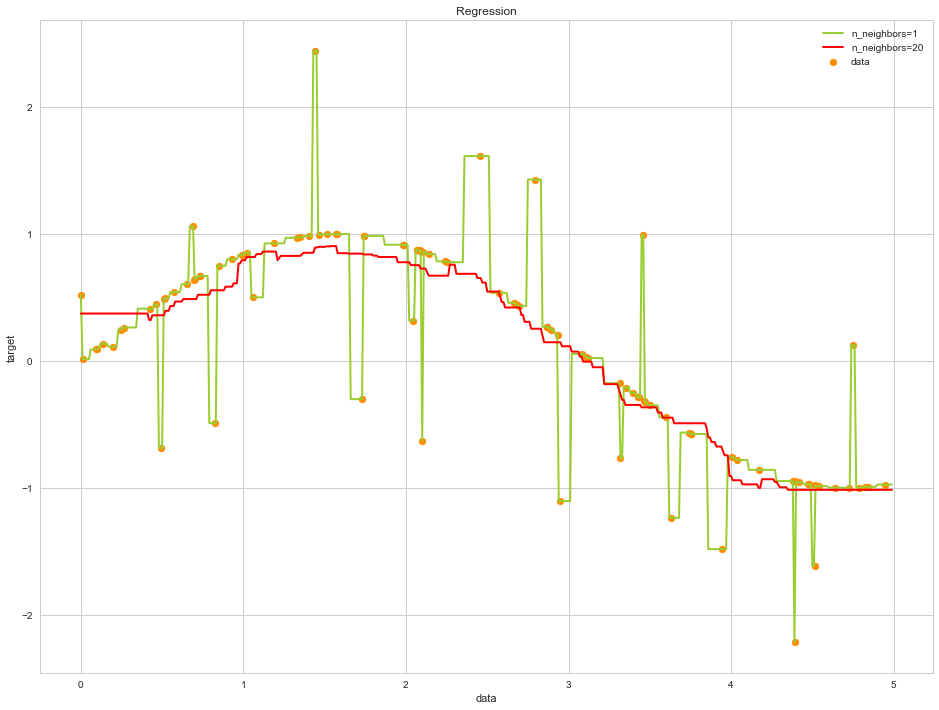

In [7]:
from sklearn.neighbors import KNeighborsRegressor
pylab.rcParams['figure.figsize'] = 16, 12


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(100, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(20))

# Fit regression model
regr_1 = KNeighborsRegressor(n_neighbors = 1)
regr_1.fit(X, y)

depth = 6
regr_2 = KNeighborsRegressor(n_neighbors= 20)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="darkorange", label="data")
plt.plot(X_test, y_1, color="yellowgreen", label="n_neighbors=1", linewidth=2)
plt.plot(X_test, y_2, color="red", label="n_neighbors=20", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Regression")
plt.legend()
plt.show()

